In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [2]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10,
            init='k-means++', # 'random', array
            n_init=10, # number of times to re-run clusters to find best results
            max_iter=300,
            tol=1e-4, # tolerance for change in centroid positions
            precompute_distances='auto', #'true', 'false' preccomes is n_samples*n_clusters <= 12000000
            verbose=0,
            random_state=0,
            copy_x=True,
            n_jobs=2,
            algorithm='auto' # 'full', 'elkan' elkan is more efficient when clusters are better defined
           )
km.fit(X_train)
#km.predict(X_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=2, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [3]:
print(km.cluster_centers_.shape) # positions of centroids don't usually correspond to an exact data point in X
print(km.labels_) # labels assigned by clustering, very like won't be the 'true' labels (if these even exist)
print(km.inertia_)
print(km.n_iter_)

(10, 784)
[0 9 9 ... 0 2 9]
142736971555.3772
54


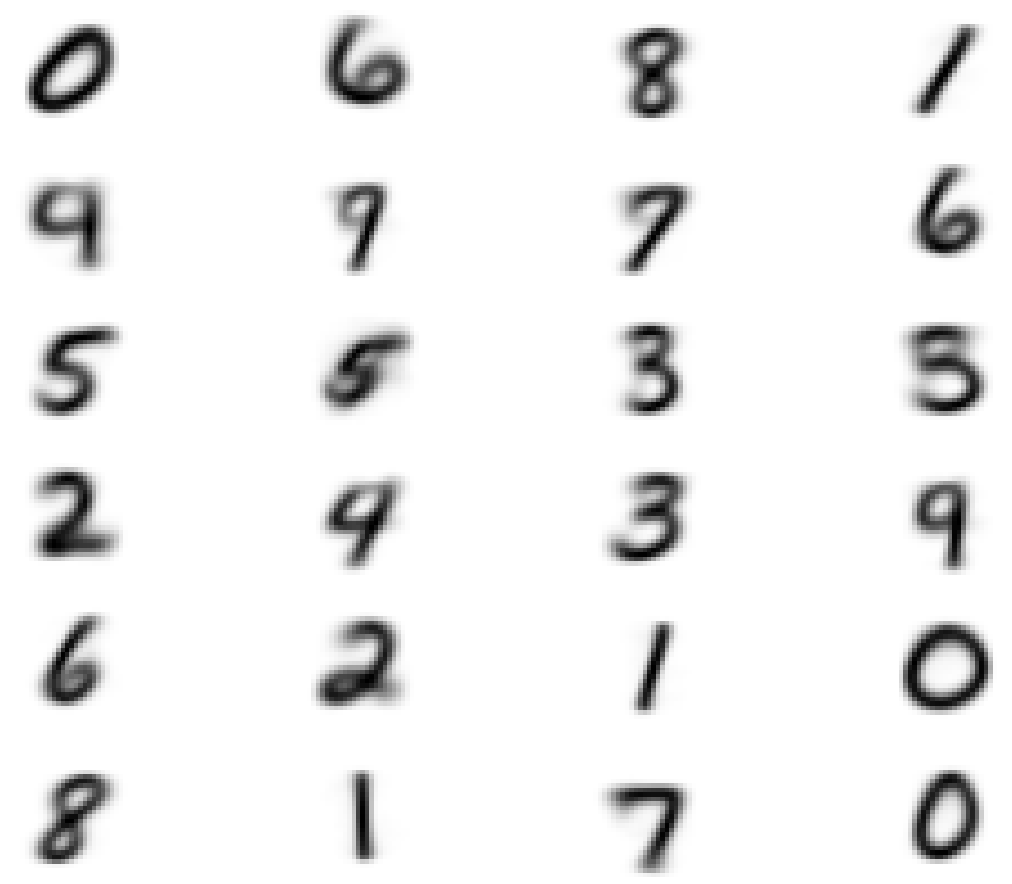

In [4]:
rows = 6
columns = 4
km = KMeans(n_clusters=rows*columns).fit(X_train)
fig = plt.figure(figsize=(20,16))

for i in range(rows):
    for j in range(columns):
        index = j + columns*i
        ax = fig.add_subplot(rows,columns,1+index)
        plt.imshow(km.cluster_centers_[index].reshape(28,28),cmap=plt.get_cmap('gray_r'))
        plt.axis('off')

plt.show()

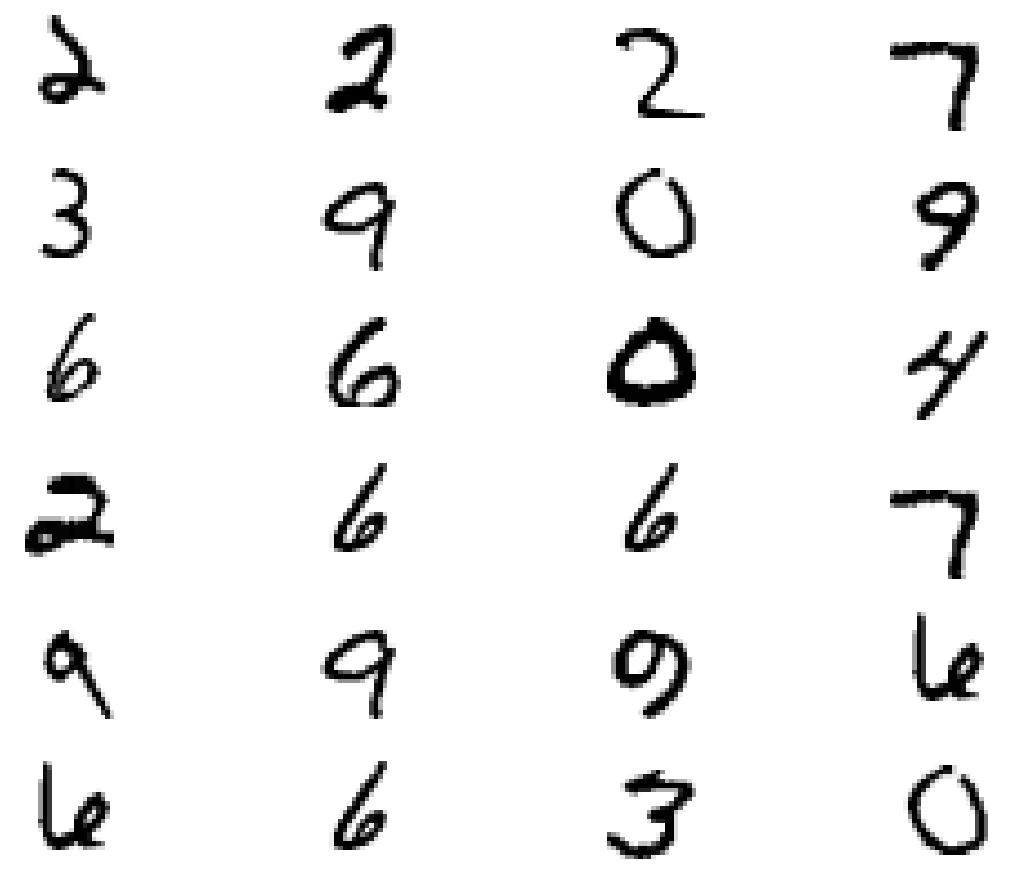

In [5]:
def findClosetsDatapoint(X_train, cluster_center):
    dists = X_train - cluster_center
    distnp= np.sum(np.power(dists,2),axis=1)
    return np.argmin(dists)
rows = 6
columns = 4
km = KMeans(n_clusters=rows*columns).fit(X_train)
fig = plt.figure(figsize=(20,16))
X_train = X_train.astype(int)
for i in range(rows):
    for j in range(columns):
        index = j + columns*i
        ax = fig.add_subplot(rows,columns,1+index)
        cdId = findClosetsDatapoint(X_train.values, km.cluster_centers_[index]) # closest data point Id
        plt.imshow(X_train.values[cdId].reshape(28,28),cmap=plt.get_cmap('gray_r'))
        plt.axis('off')

plt.show()

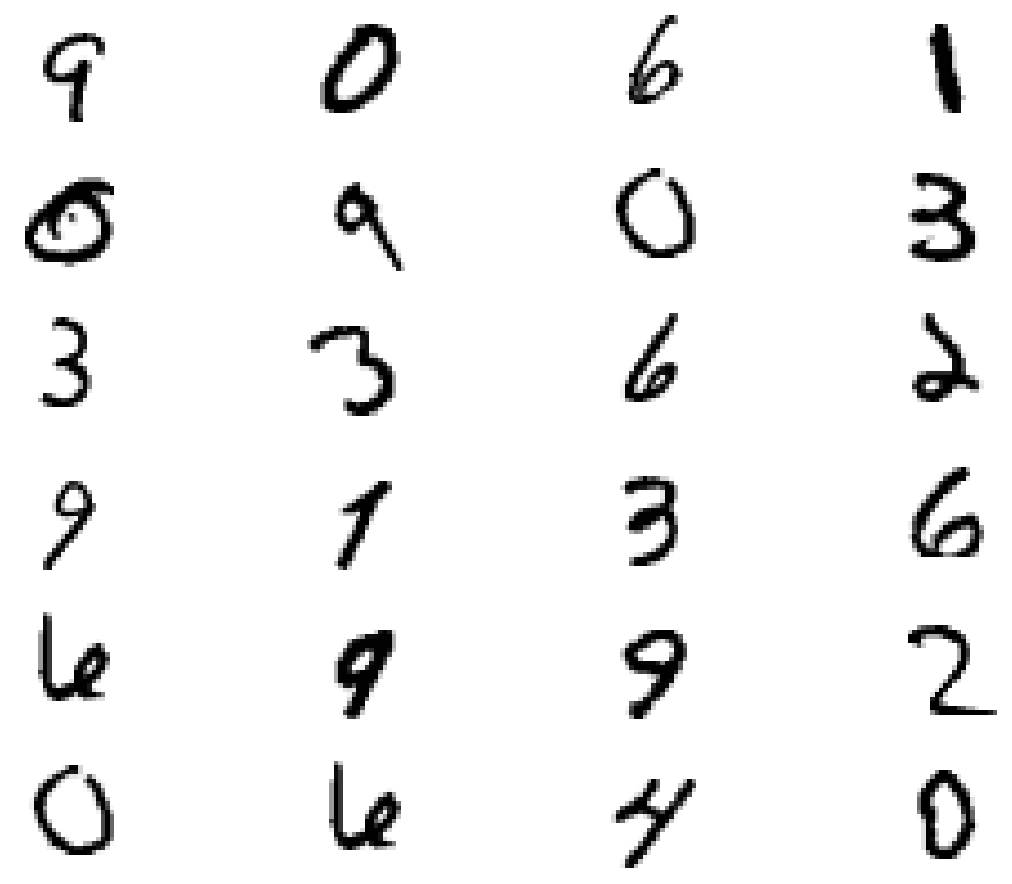

In [6]:
from sklearn.cluster import MiniBatchKMeans
mbkm = MiniBatchKMeans(n_clusters=rows*columns,
                       init='k-means++',
                       max_iter=100,
                       batch_size=100,
                       verbose=0,
                       compute_labels=True, # one minibatch converged complete inertia and label asignment for 
                                            # full dataset
                       random_state=0, # centroid placing and mini batch selection
                       tol=0.0, # variance normalized, smothed mean squared certroid movement tolerance
                                # 0.0 means don't use this metric to check for convergence
                       max_no_improvement=10, # iterations no smoothed inertia changes are found
                                              # can set to None to disable this type of convergence checking
                       init_size=None, # needs to be larger than n_clusters, default is 3*batch_size
                                       # random setset sie to use for initialization
                                       # runs batch KMeans on the random subset to then get better initialized 
                                       # centroids
                       n_init=3, # number of inits to use for above batch KMeans run. Doesn't re-run algorithm this 
                                 # many times, just reruns initialization and takes best initialization
                       reassignment_ratio=0.01 # if cluster has to few instances (e.g. <1% of the instances in
                                               # larges cluster) then cluster centroid is randomly re-assigned.
                                               # Choice is taken randomly from samples from current dataset
                                               # higher means low sample clusters are more easily re-asigned,
                                               # higher has longer training times but usually better results
                      ).fit(X_train)

fig = plt.figure(figsize=(20,16))

for i in range(rows):
    for j in range(columns):
        index = j + columns*i
        ax = fig.add_subplot(rows,columns,1+index)
        cdId = findClosetsDatapoint(X_train.values, mbkm.cluster_centers_[index]) # closest data point Id
        plt.imshow(X_train.values[cdId].reshape(28,28),cmap=plt.get_cmap('gray_r'))
        plt.axis('off')

plt.show()

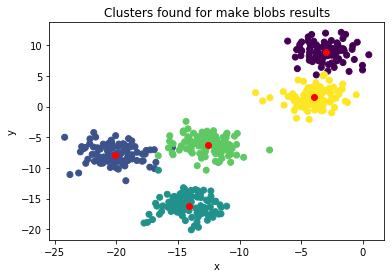

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1.5,
                  center_box=(-20.0, 20.0),
                  shuffle=True,
                  random_state=1)
plt.scatter(X[:,0],X[:,1],c=y)
km = KMeans(n_clusters=5).fit(X)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red')
plt.title('Clusters found for make blobs results')
plt.xlabel('x')
plt.ylabel('y')
plt.show()